In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import joblib

In [2]:
df = pd.read_csv("patient_churn_dataset.csv")
df.head()

,Patient_ID,Age,Gender,Tenure_Months,Visits_Last_Year,Chronic_Disease,Insurance_Type,Satisfaction_Score,Total_Bill_Amount,Missed_Appointments,Churn
0,1,56,Female,2,3,No,Government,2.5,12252.96,9,1
1,2,69,Male,10,3,Yes,Government,2.6,25862.01,4,0
2,3,46,Female,56,10,No,NaN,2.8,5659.13,4,0
3,4,32,Male,30,4,Yes,Government,4.1,19533.31,5,0
4,5,60,Male,50,19,No,Private,4.6,24639.52,5,0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   Tenure_Months        500 non-null    int64  
 4   Visits_Last_Year     500 non-null    int64  
 5   Chronic_Disease      500 non-null    object 
 6   Insurance_Type       350 non-null    object 
 7   Satisfaction_Score   500 non-null    float64
 8   Total_Bill_Amount    500 non-null    float64
 9   Missed_Appointments  500 non-null    int64  
 10  Churn                500 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 43.1+ KB


,Patient_ID,Age,Tenure_Months,Visits_Last_Year,Satisfaction_Score,Total_Bill_Amount,Missed_Appointments,Churn
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,250.500000,49.910000,29.498000,9.412000,3.049000,24440.01518,4.422000,0.248000
std,144.481833,18.221909,17.402865,5.687086,1.148136,14264.55432,2.908752,0.432284
min,1.000000,18.000000,1.000000,0.000000,1.000000,506.67000,0.000000,0.000000
25%,125.750000,35.000000,14.000000,4.000000,2.000000,13576.08750,2.000000,0.000000
50%,250.500000,50.000000,30.000000,9.000000,3.100000,23996.56000,4.000000,0.000000
75%,375.250000,66.000000,45.000000,14.000000,4.100000,36289.66000,7.000000,0.000000
max,500.000000,79.000000,59.000000,19.000000,5.000000,49892.13000,9.000000,1.000000


In [4]:
df['Churn'].value_counts()

Churn
0    376
1    124
Name: count, dtype: int64

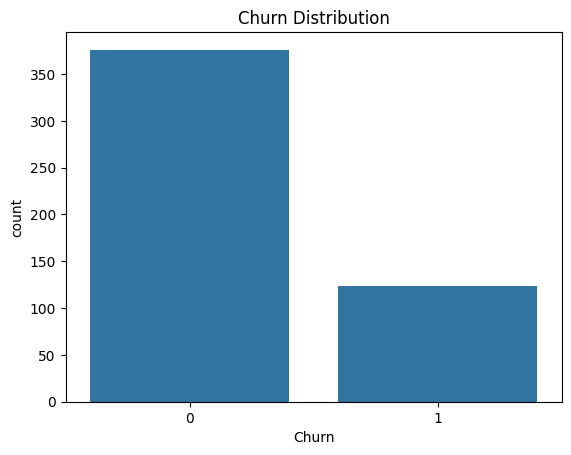

In [5]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

In [6]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [7]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [10]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

[[72  0]
 [28  0]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        72
           1       0.00      0.00      0.00        28

    accuracy                           0.72       100
   macro avg       0.36      0.50      0.42       100
weighted avg       0.52      0.72      0.60       100

ROC AUC Score: 0.5


/Users/sahilnarula/Desktop/Desktop - Sahil’s MacBook Air/python/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sahilnarula/Desktop/Desktop - Sahil’s MacBook Air/python/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sahilnarula/Desktop/Desktop - Sahil’s MacBook Air/python/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

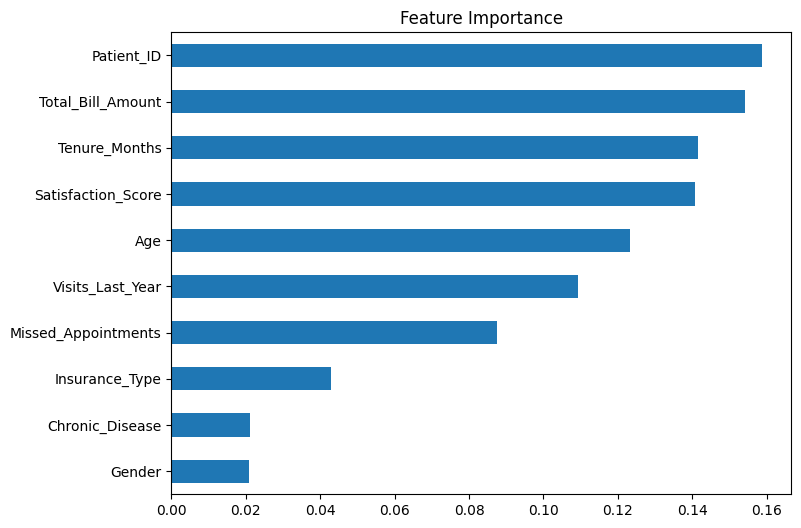

In [11]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()

In [12]:
joblib.dump(model, "churn_model.pkl")

['churn_model.pkl']

In [13]:
joblib.dump(X.columns.tolist(), "model_columns.pkl")

['model_columns.pkl']

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create dummy dataset
data = {
    "Age": [25, 40, 35, 50, 23, 60, 45, 33],
    "Visits": [2, 10, 6, 15, 1, 20, 12, 4],
    "Satisfaction": [3, 8, 6, 9, 2, 10, 7, 4],
    "Churn": [1, 0, 0, 0, 1, 0, 0, 1]
}

df = pd.DataFrame(data)

# Define features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Train model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [16]:
# Example new patient
new_patient = pd.DataFrame({
    "Age": [30],
    "Visits": [3],
    "Satisfaction": [4]
})

prediction = model.predict(new_patient)
probability = model.predict_proba(new_patient)

print("Prediction (1 = Churn, 0 = Stay):", prediction[0])
print("Churn Probability:", probability[0][1])

Prediction (1 = Churn, 0 = Stay): 1
Churn Probability: 0.965


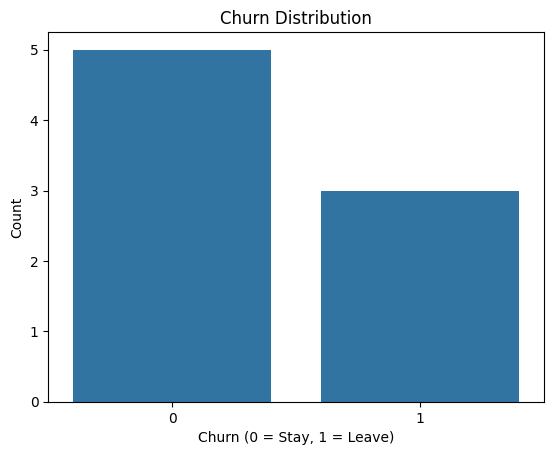

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = Stay, 1 = Leave)")
plt.ylabel("Count")
plt.show()

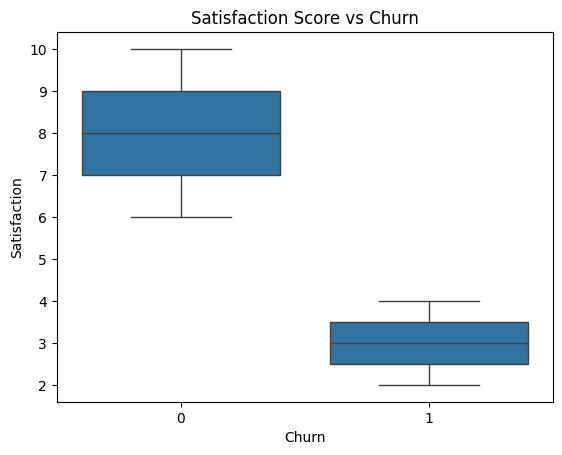

In [18]:
sns.boxplot(x="Churn", y="Satisfaction", data=df)
plt.title("Satisfaction Score vs Churn")
plt.show()

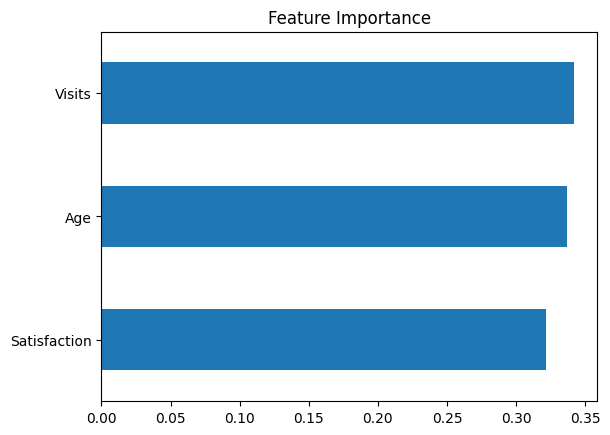

In [19]:
import pandas as pd

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh")
plt.title("Feature Importance")
plt.show()

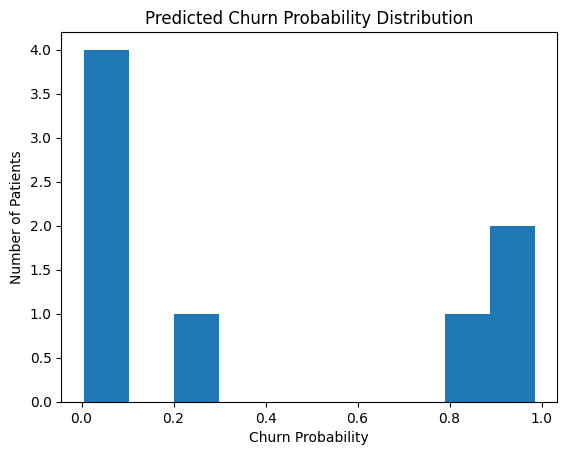

In [20]:
y_probs = model.predict_proba(X)[:, 1]

plt.hist(y_probs, bins=10)
plt.title("Predicted Churn Probability Distribution")
plt.xlabel("Churn Probability")
plt.ylabel("Number of Patients")
plt.show()